In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pickle
import pandas as pd


In [18]:
plt.style.use("/Users/nolansmyth/Dropbox/kinetic_recoupling/figures/style.mplstyle")

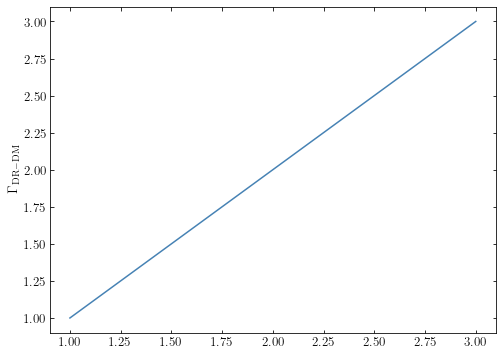

In [4]:
# os.environ['PATH'] += '/Library/TeX/texbin'
# plt.rc('text', usetex=True)
# plt.rc('font', family='times')
# # plt.rc('font', serif='CMU Serif')
plt.plot([1,2,3], [1,2,3])

plt.ylabel(r'$\Gamma_{\mathrm{DR-DM}}$')

plt.show()

In [5]:
def dmu_idm_dr(T_rec, A_rec, z, case='recoupling', a_idm_dr=1, nindex_idm_dr=4, omega0_cdm=0.12038, f_idm_dr=1.0, h=0.67556, xi=0.3):
    """
    Calculate the comoving scattering rate for a given T_rec, A_rec, z.
    """
    base_rate = (a_idm_dr * ((1+z)/(1e7))**nindex_idm_dr * omega0_cdm*f_idm_dr * h**2)
    T_idr = 2.7255 * xi

    if case == 'recoupling':
        if T_rec > T_idr * (1+z):
            return base_rate * (1 + A_rec)
            
    return base_rate

def single_decoupling_z(a_idm_dr, nindex_idm_dr=4, omega0_cdm=0.12038, f_idm_dr=1.0, h=0.67556):
    """
    Calculate the redshift at which dmu_idm_dr = 1e-3 for a given a_idm_dr for single decoupling.
    """
    return -1 + ((10**(7*nindex_idm_dr - 3))/(a_idm_dr * f_idm_dr*h**2 * omega0_cdm))**(1/nindex_idm_dr)

In [6]:
#Load pk interpolations from pickle file
pk_sd_interp = pickle.load(open('interps/pks_sd_interp.p','rb'))
pk_dd_interp = pickle.load(open('interps/pks_dd_interp.p','rb'))

In [7]:
#range of k's for which pk interpolations are valid
pk_max = 1e2
kk = np.logspace(-4, np.log10(pk_max), 500)

N_points = 100
#Values over which dd interpolation is defined
T_rec_arr = np.logspace(5, 7, N_points)
A_rec_arr = np.logspace(-1, 3, N_points)

In [6]:
#plot interpolation between two scenarios
idx = 65

print('Showing interpolation between points with A_rec = %.2f, T_rec = %.2f and A_rec = %.2f, T_rec = %.2f' % (A_rec_arr[idx], T_rec_arr[idx], A_rec_arr[idx+1], T_rec_arr[idx+1]))

num_interps = 7
T_interps = np.logspace(np.log10(T_rec_arr[idx]), np.log10(T_rec_arr[idx+1]), num_interps)
A_interps = np.logspace(np.log10(A_rec_arr[idx]), np.log10(A_rec_arr[idx+1]), num_interps)

zs = np.logspace(5,8,1000)
dmus1 = [dmu_idm_dr(T_rec_arr[idx], A_rec_arr[idx], z) for z in zs] 
dmus2 = [dmu_idm_dr(T_rec_arr[idx+1], A_rec_arr[idx+1], z) for z in zs] 


Showing interpolation between points with A_rec = 42.29, T_rec = 2056512.31 and A_rec = 46.42, T_rec = 2154434.69


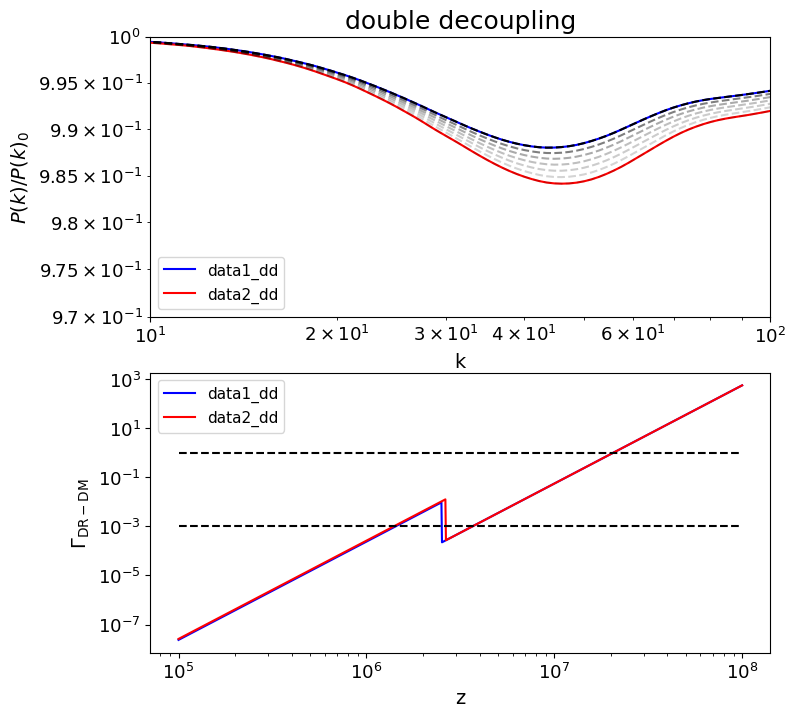

In [582]:
plt.figure(1, figsize=(8,8))
plt.subplot(211)
plt.plot(kk, pk_dd_interp((T_rec_arr[idx], A_rec_arr[idx], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'b', label='data1_dd')
plt.plot(kk, pk_dd_interp((T_rec_arr[idx+1], A_rec_arr[idx+1], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'r', label='data2_dd')
for num_interp in range(num_interps):
    plt.plot(kk, pk_dd_interp((T_interps[num_interp], A_interps[num_interp], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'--k', alpha=1/(num_interp+1))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e2)
plt.ylim(0.97,1)
plt.xlabel('k')
plt.ylabel('$P(k)/P(k)_0$')
plt.legend()
plt.title('double decoupling')
plt.subplot(212)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel(r'$\Gamma_{\mathrm{DR-DM}}$')
plt.plot(zs, dmus1, 'b', label='data1_dd')
plt.plot(zs, dmus2, 'r', label='data2_dd')
plt.plot(np.logspace(5,8,100),1e-3*np.ones(100), '--k')
plt.plot(np.logspace(5,8,100),np.ones(100), '--k')
plt.legend()
plt.show()

## Single Decoupling

In [17]:
N_points_a = 50
#Values over which sd interpolation is defined
a_idm_dr_arr = np.logspace(-5, 5, N_points_a)

In [18]:
idx_a = 30

print('Showing interpolation between points with a_idm_dr = %.2f (z_decoupling = %.2e) and a_idm_dr = %.2f (z_decoupling = %.2e)' % (a_idm_dr_arr[idx_a],single_decoupling_z(a_idm_dr_arr[idx_a]), a_idm_dr_arr[idx_a+1], single_decoupling_z(a_idm_dr_arr[idx_a+1])))

num_interps = 7
a_idm_dr_interps = np.logspace(np.log10(a_idm_dr_arr[idx_a]), np.log10(a_idm_dr_arr[idx_a+1]), num_interps)

Showing interpolation between points with a_idm_dr = 13.26 (z_decoupling = 1.92e+06) and a_idm_dr = 21.21 (z_decoupling = 1.71e+06)


In [526]:
#plot scattering rate for those two scenarios
zs = np.logspace(5,8,1000)
dmus1_sd = [dmu_idm_dr(None, None, z, a_idm_dr = a_idm_dr_arr[idx_a], case='no-rec') for z in zs] 
dmus2_sd = [dmu_idm_dr(None, None, z, a_idm_dr = a_idm_dr_arr[idx_a+1], case='no-rec') for z in zs] 


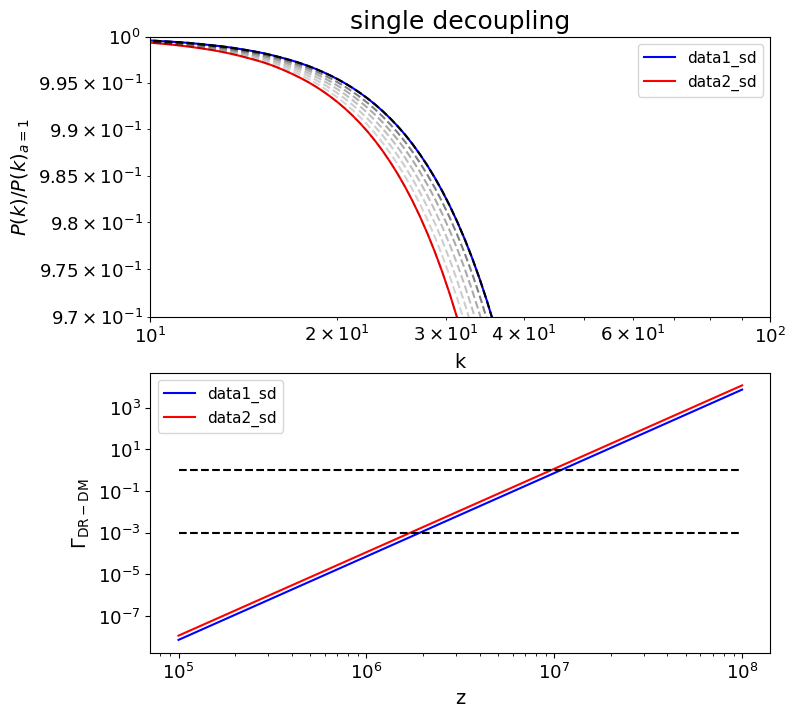

In [580]:
plt.figure(1, figsize=(8,8))
plt.subplot(211)
plt.plot(kk, pk_sd_interp((a_idm_dr_arr[idx_a], kk))/pk_sd_interp((1,kk)),'b', label='data1_sd')
plt.plot(kk, pk_sd_interp((a_idm_dr_arr[idx_a+1], kk))/pk_sd_interp((1,kk)),'r', label='data2_sd')
for num_interp in range(num_interps):
    plt.plot(kk, pk_sd_interp((a_idm_dr_interps[num_interp], kk))/pk_sd_interp((1,kk)),'--k', alpha=1/(num_interp+1))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e2)
plt.ylim(0.97,1)
plt.xlabel('k')
plt.ylabel('$P(k)/P(k)_{a=1}$')
plt.legend()
plt.title('single decoupling')
plt.subplot(212)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('$\Gamma_{\mathrm{DR-DM}}$')
plt.plot(zs, dmus1_sd, 'b', label='data1_sd')
plt.plot(zs, dmus2_sd, 'r', label='data2_sd')
plt.plot(np.logspace(5,8,100),1e-3*np.ones(100), '--k')
plt.plot(np.logspace(5,8,100),np.ones(100), '--k')
plt.legend()
plt.show()

## Best fit sd vs dd cases

In [239]:
def best_sd_fit(T_rec, A_rec, a_idm_dr_arr):
    '''
    For a given double decoupling case, finds the best fit a_idm_dr for a single decoupling case using an l2 metric
    #currently ~4.5 secs. Can improve?
    '''
    l2best = np.inf
    l2best_a = 0
    for a in a_idm_dr_arr: #only searching over a_idm_dr values that were defined in the sd interpolation
        l2 = np.sum([(pk_dd_interp((T_rec, A_rec, k)) - pk_sd_interp((a, k)))**2 for k in kk[-200:]]) #Only look at highest k
        if l2 < l2best:
            l2best = l2
            l2best_a = a
    return l2best, l2best_a

def best_sd_fit_dimless(T_rec, A_rec, a_idm_dr_arr):
    '''
    For a given double decoupling case, finds the best fit a_idm_dr for a single decoupling case using an l2 metric for the dimensionless power spectrum
    '''
    l2best = np.inf
    l2best_a = 0
    for a in a_idm_dr_arr: #only searching over a_idm_dr values that were defined in the sd interpolation
        l2 = np.sum([(pk_dd_interp((T_rec, A_rec, k))*(k**3)/(2*np.pi**2) - pk_sd_interp((a, k))*(k**3)/(2*np.pi**2))**2 for k in kk[-200:]]) #Only look at highest k
        if l2 < l2best:
            l2best = l2
            l2best_a = a
    return l2best, l2best_a

In [539]:
T_rec_arr_test = T_rec_arr[50:]
A_rec_arr_test = A_rec_arr[50:]

In [40]:
#Load best fits to avoid running scan
best_fits_saved = np.load("./interps/best_fit_sds.npz")

l2_best_dimless_arr = best_fits_saved['l2_best_dimless_arr']
best_a_dimless_arr = best_fits_saved['best_a_dimless_arr']
T_rec_arr_test = best_fits_saved['T_rec_arr_test']
A_rec_arr_test = best_fits_saved['A_rec_arr_test']

# #Scan over params in dimless space

# l2_best_dimless_arr = np.zeros((len(T_rec_arr_test), len(A_rec_arr_test)))
# best_a_dimless_arr = np.zeros((len(T_rec_arr_test), len(A_rec_arr_test)))

# for i, T_rec in enumerate(T_rec_arr_test):
#     for j, A_rec in enumerate(A_rec_arr_test):
#         l2_best_dimless_arr[i,j], best_a_dimless_arr[i,j] = best_sd_fit_dimless(T_rec, A_rec, a_idm_dr_arr)

# np.savez(
#         "./interps/best_fit_sds.npz",
#         l2_best_dimless_arr=l2_best_dimless_arr,
#         best_a_dimless_arr=best_a_dimless_arr,
#         T_rec_arr_test=T_rec_arr_test,
#         A_rec_arr_test=A_rec_arr_test,
#     )

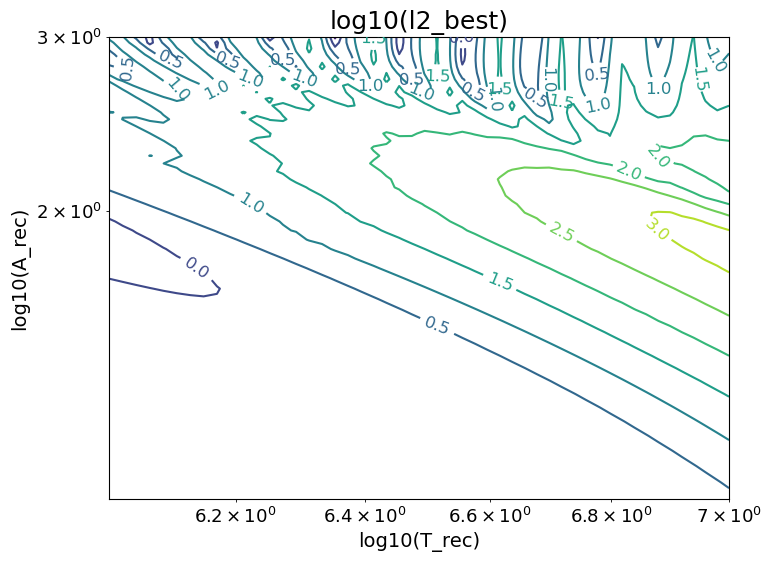

In [555]:
fig, ax = plt.subplots()
CS = ax.contour(np.log10(T_rec_arr_test), np.log10(A_rec_arr_test), np.log10(l2_best_dimless_arr))
ax.clabel(CS, inline=True, fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log10(T_rec)')
ax.set_ylabel('log10(A_rec)')
ax.set_title('log10(l2_best)')
plt.show()

## Load and plot BOSS + DESY1 data

In [ ]:
dflcdm = pd.read_csv('output/lambdacdm00_pk.dat', header=None, names=['k', 'P(k)'], skiprows=4, delimiter='\s+')

In [42]:
dfDES = pd.read_csv("DESY1.csv")

In [43]:
dfDES = dfDES.assign(ylow = dfDES["Y"] - dfDES["-DeltaY"], yhigh = dfDES["+DeltaY"] - dfDES["Y"])
dfDES = dfDES.assign(xlow = dfDES["X"] - dfDES["-DeltaX"], xhigh = dfDES["+DeltaX"] - dfDES["X"])
yerrDES = np.array([dfDES["ylow"], dfDES['yhigh']])
xerrDES = np.array([dfDES["xlow"], dfDES['xhigh']])

yerrDESdimless = np.array([dfDES["ylow"]*(dfDES['X']**3)/(2*(np.pi**2)), dfDES['yhigh']*(dfDES['X']**3)/(2*(np.pi**2))])

In [44]:
columns = ["k", "P(k)", "delta P(k)+", "delta P(k)-"]
dfBOSS = pd.read_csv("BOSS.csv", header=None)
dfBOSS.columns = columns
# yerr = np.array([dfBOSS["delta P(k)-"], dfBOSS['delta P(k)+']])

In [45]:
dfBOSS= dfBOSS.assign(ylow = dfBOSS["P(k)"] - dfBOSS["delta P(k)-"], yhigh = dfBOSS["delta P(k)+"] - dfBOSS["P(k)"])
yerrBOSS = np.array([dfBOSS["ylow"], dfBOSS['yhigh']])

yerrBOSSdimless = np.array([dfBOSS["ylow"]*(dfBOSS['k']**3)/(2*(np.pi**2)), dfBOSS['yhigh']*(dfBOSS['k']**3)/(2*(np.pi**2))])

## Projected Observations

In [33]:
dfHERA = pd.read_csv("HeraProjected.csv")
dfEDGES = pd.read_csv("EDGESProjected.csv")

In [34]:
dfHERA = dfHERA.assign(ylow = dfHERA["Y"] - dfHERA["-DeltaY"], yhigh = dfHERA["+DeltaY"] - dfHERA["Y"])
dfHERA = dfHERA.assign(xlow = dfHERA["X"] - dfHERA["-DeltaX"], xhigh = dfHERA["+DeltaX"] - dfHERA["X"])
yerrHERA = np.array([dfHERA["ylow"], dfHERA['yhigh']])
xerrHERA = np.array([dfHERA["xlow"], dfHERA['xhigh']])

In [35]:
dfEDGES = dfEDGES.assign(ylow = dfEDGES["Y"] - dfEDGES["-DeltaY"], yhigh = dfEDGES["+DeltaY"] - dfEDGES["Y"])
dfEDGES = dfEDGES.assign(xlow = dfEDGES["X"] - dfEDGES["-DeltaX"], xhigh = dfEDGES["+DeltaX"] - dfEDGES["X"])
yerrEDGES = np.array([dfEDGES["ylow"], dfEDGES['yhigh']])
xerrEDGES = np.array([dfEDGES["xlow"], dfEDGES['xhigh']])

#Adjust projections to agree with lcdm line
dfEDGES['Y'] = [1.05*dflcdm['P(k)'][121]*(dflcdm['k'][121]**3)/(2*np.pi**2), dflcdm['P(k)'][129]*(dflcdm['k'][129]**3)/(2*np.pi**2)]
dfHERA['Y'] = [1.05*dflcdm['P(k)'][121]*(dflcdm['k'][121]**3)/(2*np.pi**2), dflcdm['P(k)'][128]*(dflcdm['k'][128]**3)/(2*np.pi**2),dflcdm['P(k)'][130]*(dflcdm['k'][130]**3)/(2*np.pi**2)]

In [36]:
#Go from dimensionless to physical power spectrum
yerrHERAdim = np.array([dfHERA["ylow"]*2*(np.pi**2)/(dfHERA['X']**3), dfHERA['yhigh']*2*np.pi/(dfHERA['X']**3)])
yerrEDGESdim = np.array([dfEDGES["ylow"]*2*(np.pi**2)/(dfEDGES['X']**3), dfEDGES['yhigh']*2*np.pi/(dfEDGES['X']**3)])

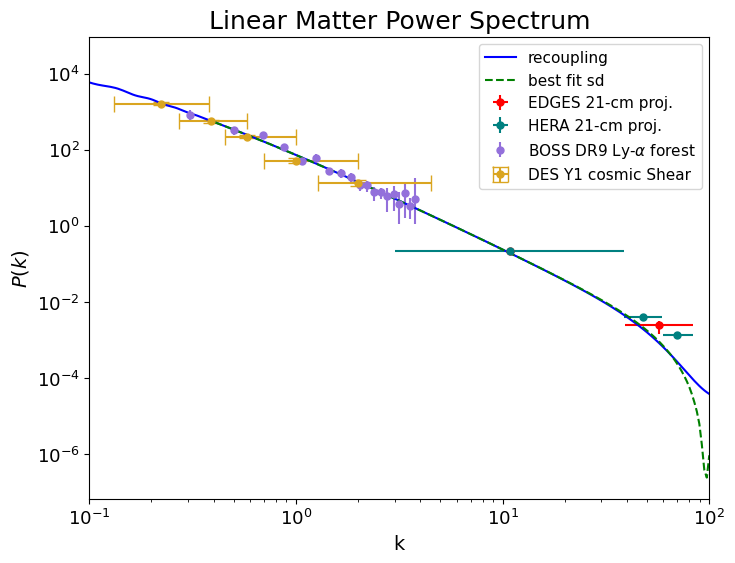

In [557]:
plot_idx=83
plt.figure()
plt.errorbar(dfEDGES['X'], dfEDGES['Y']*2*(np.pi**2)/dfEDGES['X']**3, xerr=xerrEDGES, yerr=yerrEDGESdim,marker='o', ms=5, color='r', ls='none', label=r'EDGES 21-cm proj.')
plt.errorbar(dfHERA['X'], dfHERA['Y']*2*(np.pi**2)/dfHERA['X']**3, xerr=xerrHERA, yerr=yerrHERAdim, marker='o', ms=5, color='teal', ls='none', label=r'HERA 21-cm proj.')
plt.errorbar(dfBOSS['k'], dfBOSS['P(k)'], yerr=yerrBOSS, marker='o', ms=5, color='mediumpurple', ls='none', label=r'BOSS DR9 Ly-$\alpha$ forest')
plt.errorbar(dfDES['X'], dfDES['Y'], yerr=yerrDES, xerr=xerrDES, marker='o', ms=5, color='goldenrod', ls='none', capsize=6, label='DES Y1 cosmic Shear')

plt.plot(kk, pk_dd_interp((T_rec_arr[plot_idx], A_rec_arr[plot_idx], kk)),'b', label='recoupling')
plt.plot(kk[-200:], pk_sd_interp((best_a_dimless_arr[plot_idx-50, plot_idx-50], kk[-200:])),'g--', label='best fit sd') #only used highest 50 indices for best fit
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('k')
plt.ylabel('$P(k)$')
plt.title('Linear Matter Power Spectrum')
plt.xlim(0.1,100)
plt.show()

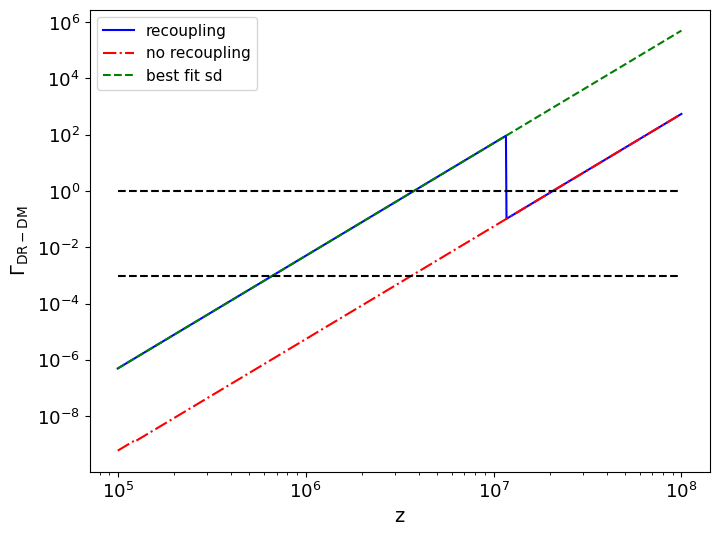

In [579]:
zs = np.logspace(5,8,1000)
dmus = [dmu_idm_dr(T_rec_arr[plot_idx], A_rec_arr[plot_idx], z) for z in zs] 
dmusnorec = [dmu_idm_dr(T_rec_arr[0], A_rec_arr[0], z) for z in zs]
dmusbestfitsd = [dmu_idm_dr(None, None, z, a_idm_dr=best_a_dimless_arr[plot_idx-50, plot_idx-50], case='no_rec') for z in zs]


plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('$\Gamma_{\mathrm{DR-DM}}$')
plt.plot(zs, dmus, 'b', label='recoupling')
plt.plot(zs, dmusnorec, 'r-.', label='no recoupling')
plt.plot(zs, dmusbestfitsd, 'g--', label='best fit sd')
plt.plot(np.logspace(5,8,100),1e-3*np.ones(100), '--k')
plt.plot(np.logspace(5,8,100),np.ones(100), '--k')
# plt.ylim(1e-2,1e0)
# plt.xlim(2e6,5e6)
plt.legend()
plt.show()

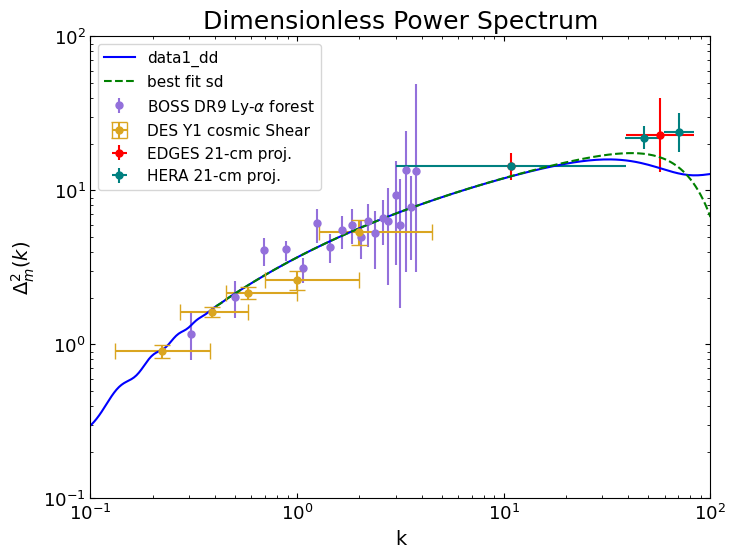

In [630]:
plot_idx=78

plt.figure()

plt.plot(kk, pk_dd_interp((T_rec_arr[plot_idx], A_rec_arr[plot_idx], kk))*(kk**3)/(2*np.pi**2),'b', label='data1_dd')
plt.plot(kk[-200:], pk_sd_interp((best_a_dimless_arr[plot_idx-50, plot_idx-50], kk[-200:]))*(kk[-200:]**3)/(2*np.pi**2),'g--', label='best fit sd')

plt.errorbar(dfBOSS['k'], dfBOSS['P(k)']*(dfBOSS['k'])**3/(2*np.pi**2), yerr=yerrBOSSdimless, marker='o', ms=5, color='mediumpurple', ls='none', label=r'BOSS DR9 Ly-$\alpha$ forest')
plt.errorbar(dfDES['X'], dfDES['Y']*(dfDES['X']**3)/(2*np.pi**2), yerr=yerrDESdimless, xerr=xerrDES, marker='o', ms=5, color='goldenrod', ls='none', capsize=6, label='DES Y1 cosmic Shear')

#No conversion because these are already dimensionless
plt.errorbar(dfEDGES['X'], dfEDGES['Y'], xerr=xerrEDGES, yerr=yerrEDGES,marker='o', ms=5, color='r', ls='none', label=r'EDGES 21-cm proj.')
plt.errorbar(dfHERA['X'], dfHERA['Y'], xerr=xerrHERA, yerr=yerrHERA, marker='o', ms=5, color='teal', ls='none', label=r'HERA 21-cm proj.')

plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1,100)
# plt.xlim(10,100)
plt.ylim(1e-1,1e2)
plt.xlabel('k')
plt.ylabel('$\Delta^2_m(k)$')
plt.title('Dimensionless Power Spectrum')
plt.legend(loc='upper left')
plt.show()

## Warm DM case

In [38]:
dfWarm = pd.read_csv('output/warm22_pk.dat', header=None, names=['k', 'P(k)'], skiprows=4, delimiter='\s+')
dfWarmDig = pd.read_csv('WarmDM.csv', header=None, names=['k', 'delta^2(k)'])
dfWarmlight = pd.read_csv('output/warm26_pk.dat', header=None, names=['k', 'P(k)'], skiprows=4, delimiter='\s+')

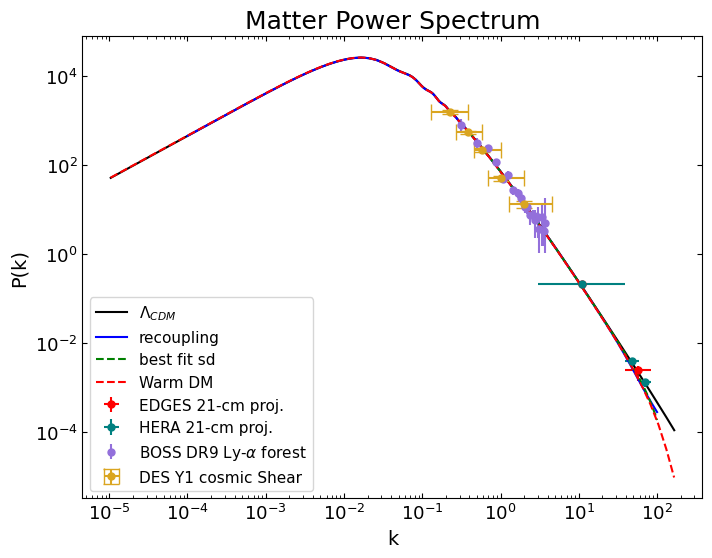

In [633]:
plt.figure()

plt.plot(dflcdm['k'], dflcdm['P(k)'], 'k', label=r'$\Lambda_{CDM}$')

plt.plot(kk, pk_dd_interp((T_rec_arr[plot_idx], A_rec_arr[plot_idx], kk)),'b', label='recoupling')
plt.plot(kk[-200:], pk_sd_interp((best_a_dimless_arr[plot_idx-50, plot_idx-50], kk[-200:])),'g--', label='best fit sd')

plt.plot(dfWarm['k'], dfWarm['P(k)'], 'r--', label='Warm DM')
# plt.plot(dfWarmDig['k'], dfWarmDig['delta^2(k)']*2*(np.pi**2)/(dfWarmDig['k']**3), 'r--', label='Warm DM')

plt.errorbar(dfEDGES['X'], dfEDGES['Y']*2*(np.pi**2)/dfEDGES['X']**3, xerr=xerrEDGES, yerr=yerrEDGESdim,marker='o', ms=5, color='r', ls='none', label=r'EDGES 21-cm proj.')
plt.errorbar(dfHERA['X'], dfHERA['Y']*2*(np.pi**2)/dfHERA['X']**3, xerr=xerrHERA, yerr=yerrHERAdim, marker='o', ms=5, color='teal', ls='none', label=r'HERA 21-cm proj.')
plt.errorbar(dfBOSS['k'], dfBOSS['P(k)'], yerr=yerrBOSS, marker='o', ms=5, color='mediumpurple', ls='none', label=r'BOSS DR9 Ly-$\alpha$ forest')
plt.errorbar(dfDES['X'], dfDES['Y'], yerr=yerrDES, xerr=xerrDES, marker='o', ms=5, color='goldenrod', ls='none', capsize=6, label='DES Y1 cosmic Shear')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('Matter Power Spectrum')
plt.legend()
plt.show()

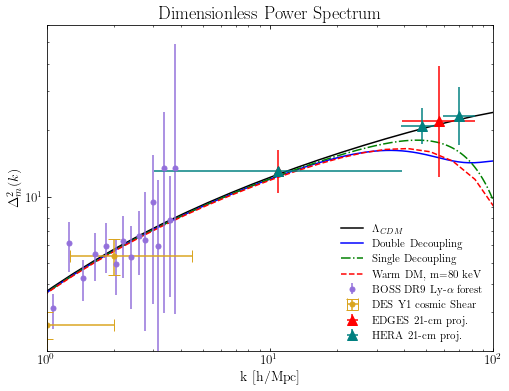

In [154]:
plot_idx=77
# plot_idx=51

plt.figure()

plt.plot(dflcdm['k'], dflcdm['P(k)']*(dflcdm['k']**3)/(2*np.pi**2), 'k', label=r'$\Lambda_{CDM}$')

plt.plot(kk, pk_dd_interp((T_rec_arr[plot_idx], A_rec_arr[plot_idx], kk))*(kk**3)/(2*np.pi**2),'b', label='Double Decoupling')
plt.plot(kk[-200:], pk_sd_interp((best_a_dimless_arr[plot_idx-50, plot_idx-50], kk[-200:]))*(kk[-200:]**3)/(2*np.pi**2),'g-.', label='Single Decoupling')

# plt.plot(dfWarmDig['k'], dfWarmDig['delta^2(k)'], 'r--', label='Warm DM')
plt.plot(dfWarm['k'], dfWarm['P(k)']*(dfWarm['k']**3)/(2*np.pi**2), 'r--', label='Warm DM, m=80 keV')

plt.errorbar(dfBOSS['k'], dfBOSS['P(k)']*(dfBOSS['k'])**3/(2*np.pi**2), yerr=yerrBOSSdimless, marker='o', ms=5, color='mediumpurple', ls='none', label=r'BOSS DR9 Ly-$\alpha$ forest')
plt.errorbar(dfDES['X'], dfDES['Y']*(dfDES['X']**3)/(2*np.pi**2), yerr=yerrDESdimless, xerr=xerrDES, marker='o', ms=5, color='goldenrod', ls='none', capsize=6, label='DES Y1 cosmic Shear')

#No conversion because these are already dimensionless
plt.errorbar(dfEDGES['X'], dfEDGES['Y'], xerr=xerrEDGES, yerr=yerrEDGES,marker='^', ms=10, color='r', ls='none', label=r'EDGES 21-cm proj.')
plt.errorbar(dfHERA['X'], dfHERA['Y'], xerr=xerrHERA, yerr=yerrHERA, marker='^', ms=10, color='teal', ls='none', label=r'HERA 21-cm proj.')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1,100)
# plt.xlim(10,100)
plt.ylim(2,6e1)
plt.xlabel('k [h/Mpc]')
plt.ylabel('$\Delta^2_m(k)$')
plt.title('Dimensionless Power Spectrum')
plt.legend(loc='lower right')

# plt.savefig('Figures/dimless_power_spectrum.png')
plt.show()

dfWarmlight = pd.read_csv('output/warm26_pk.dat', header=None, names=['k', 'P(k)'], skiprows=4, delimiter='\s+')

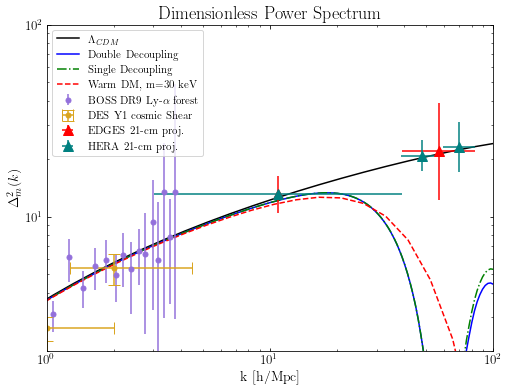

In [155]:
plot_idx=98
# plot_idx=77


plt.figure()

plt.plot(dflcdm['k'], dflcdm['P(k)']*(dflcdm['k']**3)/(2*np.pi**2), 'k', label=r'$\Lambda_{CDM}$')

plt.plot(kk, pk_dd_interp((T_rec_arr[plot_idx], A_rec_arr[plot_idx], kk))*(kk**3)/(2*np.pi**2),'b', label='Double Decoupling')
# plt.plot(kk[-200:], pk_sd_interp((best_a_arr[plot_idx-50, plot_idx-50], kk[-200:]))*(kk[-200:]**3)/(2*np.pi**2),'g--', label='best fit sd')
plt.plot(kk[-200:], pk_sd_interp((best_a_dimless_arr[plot_idx-50, plot_idx-50], kk[-200:]))*(kk[-200:]**3)/(2*np.pi**2),'g-.', label='Single Decoupling')

# plt.plot(dfWarmDig['k'], dfWarmDig['delta^2(k)'], 'r--', label='Warm DM')
plt.plot(dfWarmlight['k'], dfWarmlight['P(k)']*(dfWarm['k']**3)/(2*np.pi**2), 'r--', label='Warm DM, m=30 keV')

plt.errorbar(dfBOSS['k'], dfBOSS['P(k)']*(dfBOSS['k'])**3/(2*np.pi**2), yerr=yerrBOSSdimless, marker='o', ms=5, color='mediumpurple', ls='none', label=r'BOSS DR9 Ly-$\alpha$ forest')
plt.errorbar(dfDES['X'], dfDES['Y']*(dfDES['X']**3)/(2*np.pi**2), yerr=yerrDESdimless, xerr=xerrDES, marker='o', ms=5, color='goldenrod', ls='none', capsize=6, label='DES Y1 cosmic Shear')

#No conversion because these are already dimensionless
plt.errorbar(dfEDGES['X'], dfEDGES['Y'], xerr=xerrEDGES, yerr=yerrEDGES,marker='^', ms=10, color='r', ls='none', label=r'EDGES 21-cm proj.')
plt.errorbar(dfHERA['X'], dfHERA['Y'], xerr=xerrHERA, yerr=yerrHERA, marker='^', ms=10, color='teal', ls='none', label=r'HERA 21-cm proj.')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1,100)
# plt.xlim(10,100)
plt.ylim(2,1e2)
plt.xlabel('k [h/Mpc]')
plt.ylabel('$\Delta^2_m(k)$')
plt.title('Dimensionless Power Spectrum')
plt.legend(loc='upper left')
plt.legend(frameon=True)

# plt.savefig('Figures/dimless_power_spectrum_earlier.png')
plt.show()

move projections
understand size of errors (look at paper)
describe plots in text.
meet after group meeting next week. 

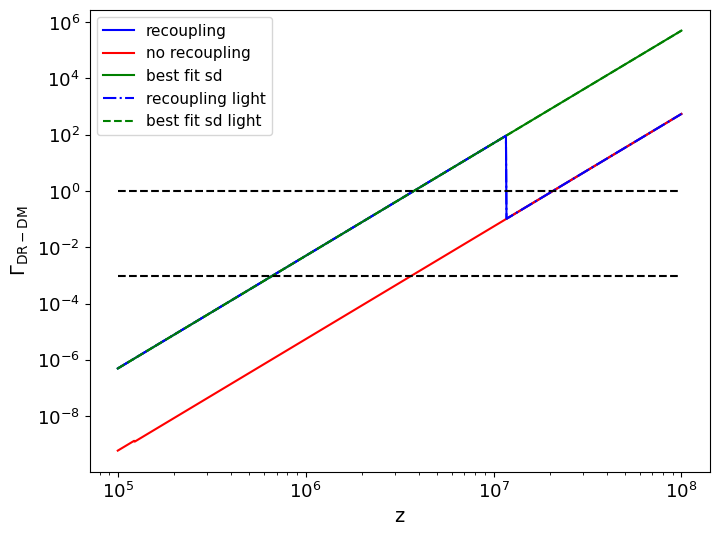

In [578]:
zs = np.logspace(5,8,1000)
dmus = [dmu_idm_dr(T_rec_arr[plot_idx], A_rec_arr[plot_idx], z) for z in zs] 
dmusnorec = [dmu_idm_dr(T_rec_arr[0], A_rec_arr[0], z) for z in zs]
dmusbestfitsd = [dmu_idm_dr(None, None, z, a_idm_dr=best_a_dimless_arr[plot_idx-50, plot_idx-50], case='no_rec') for z in zs]

dmuslight = [dmu_idm_dr(T_rec_arr[98], A_rec_arr[98], z) for z in zs] 
# dmusnorec = [dmu_idm_dr(T_rec_arr[0], A_rec_arr[0], z) for z in zs]
dmusbestfitsdlight = [dmu_idm_dr(None, None, z, a_idm_dr=best_a_dimless_arr[98-50, 98-50], case='no_rec') for z in zs]


plt.figure(1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('$\Gamma_{\mathrm{DR-DM}}$')
plt.plot(zs, dmus, 'b', label='recoupling')
plt.plot(zs, dmusnorec, 'r', label='no recoupling')
plt.plot(zs, dmusbestfitsd, 'g', label='best fit sd')

plt.plot(zs, dmuslight, 'b-.', label='recoupling light')
plt.plot(zs, dmusbestfitsdlight, 'g--', label='best fit sd light')

plt.plot(np.logspace(5,8,100),1e-3*np.ones(100), '--k')
plt.plot(np.logspace(5,8,100),np.ones(100), '--k')
# plt.ylim(1e-2,1e0)
# plt.xlim(2e6,5e6)
plt.legend()
plt.show()

## Vary T_rec and A_rec plots

### Varying Amplitude

In [8]:
#plot interpolation between two scenarios
idx = 65
idx_add = idx+8

print('Showing interpolation between points with A_rec = %.2e, T_rec = %.2e and A_rec = %.2e, T_rec = %.2e' % (A_rec_arr[idx], T_rec_arr[idx], A_rec_arr[idx_add], T_rec_arr[idx]))

num_interps = 7
T_interps = np.logspace(np.log10(T_rec_arr[idx]), np.log10(T_rec_arr[idx]), num_interps)
A_interps = np.logspace(np.log10(A_rec_arr[idx]), np.log10(A_rec_arr[idx_add]), num_interps)

zs = np.logspace(5,8,1000)
dmus1 = [dmu_idm_dr(T_rec_arr[idx], A_rec_arr[idx], z) for z in zs] 
dmus2 = [dmu_idm_dr(T_rec_arr[idx], A_rec_arr[idx_add], z) for z in zs] 


Showing interpolation between points with A_rec = 4.23e+01, T_rec = 2.06e+06 and A_rec = 8.90e+01, T_rec = 2.06e+06


In [20]:
import matplotlib.ticker as mticker
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = mticker.FuncFormatter(g)

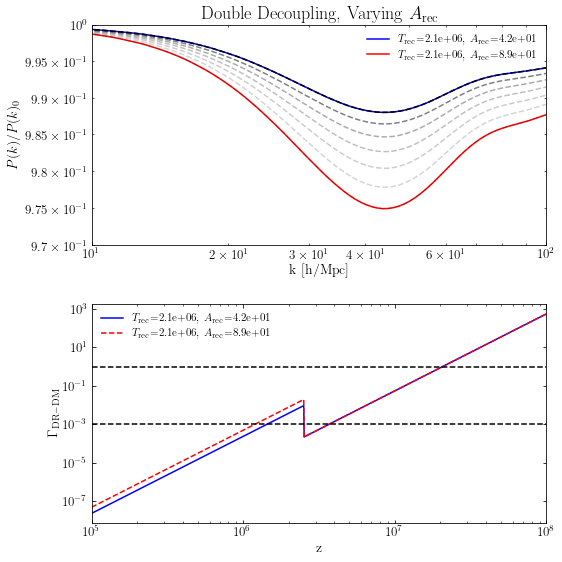

In [26]:
fig = plt.figure(1, figsize=(8,8))
plt.subplot(211)
plt.plot(kk, pk_dd_interp((T_rec_arr[idx], A_rec_arr[idx], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'b', label='$T_\mathrm{rec}$=%.1e, $A_\mathrm{rec}$=%.1e'%(T_rec_arr[idx], A_rec_arr[idx]))
plt.plot(kk, pk_dd_interp((T_rec_arr[idx], A_rec_arr[idx_add], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'r', label='$T_\mathrm{rec}$=%.1e, $A_\mathrm{rec}$=%.1e'%(T_rec_arr[idx], A_rec_arr[idx_add]))
for num_interp in range(num_interps):
    plt.plot(kk, pk_dd_interp((T_interps[num_interp], A_interps[num_interp], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'--k', alpha=1/(num_interp+1))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e2)
plt.ylim(0.97,1)
plt.xlabel('k [h/Mpc]')
plt.ylabel('$P(k)/P(k)_0$')
plt.legend()
plt.title('Double Decoupling, Varying $A_\mathrm{rec}$')
plt.subplot(212)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('$\Gamma_{\mathrm{DR-DM}}$')
plt.plot(zs, dmus1, 'b', label='$T_\mathrm{rec}$=%.1e, $A_\mathrm{rec}$=%.1e'%(T_rec_arr[idx], A_rec_arr[idx]))
plt.plot(zs, dmus2, 'r--', label='$T_\mathrm{rec}$=%.1e, $A_\mathrm{rec}$=%.1e'%(T_rec_arr[idx], A_rec_arr[idx_add]))
plt.plot(np.logspace(5,8,100),1e-3*np.ones(100), '--k')
plt.plot(np.logspace(5,8,100),np.ones(100), '--k')

plt.xlim(zs[0], zs[-1])

plt.legend()
fig.tight_layout(h_pad=2)

plt.savefig('Figures/vary_A_rec_new.png')
# plt.show()

### Varying T_rec

In [28]:
#plot interpolation between two scenarios
idx = 65
idx_add = idx+4

print('Showing interpolation between points with A_rec = %.2e, T_rec = %.2e and A_rec = %.2e, T_rec = %.2e' % (A_rec_arr[idx], T_rec_arr[idx], A_rec_arr[idx], T_rec_arr[idx_add]))

num_interps = 7
T_interps = np.logspace(np.log10(T_rec_arr[idx]), np.log10(T_rec_arr[idx_add]), num_interps)
A_interps = np.logspace(np.log10(A_rec_arr[idx]), np.log10(A_rec_arr[idx]), num_interps)

zs = np.logspace(5,8,1000)
dmus1 = [dmu_idm_dr(T_rec_arr[idx], A_rec_arr[idx], z) for z in zs] 
dmus2 = [dmu_idm_dr(T_rec_arr[idx_add], A_rec_arr[idx], z) for z in zs] 


Showing interpolation between points with A_rec = 4.23e+01, T_rec = 2.06e+06 and A_rec = 4.23e+01, T_rec = 2.48e+06


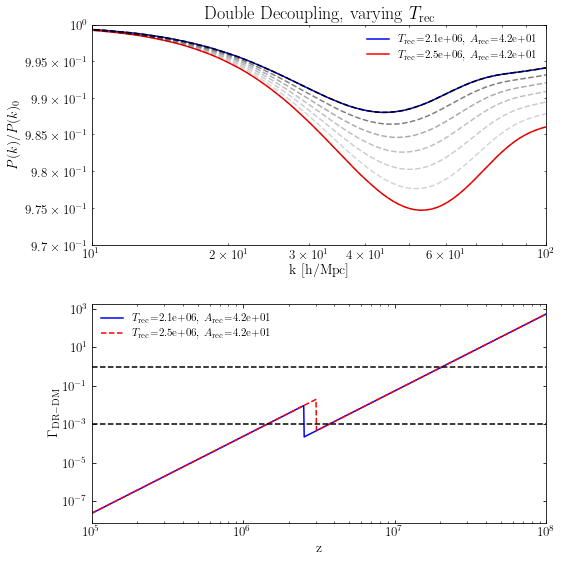

In [29]:
fig = plt.figure(1, figsize=(8,8))
plt.subplot(211)
plt.plot(kk, pk_dd_interp((T_rec_arr[idx], A_rec_arr[idx], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'b', label='$T_\mathrm{rec}$=%.1e, $A_\mathrm{rec}$=%.1e'%(T_rec_arr[idx], A_rec_arr[idx]))
plt.plot(kk, pk_dd_interp((T_rec_arr[idx_add], A_rec_arr[idx], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'r', label='$T_\mathrm{rec}$=%.1e, $A_\mathrm{rec}$=%.1e'%(T_rec_arr[idx_add], A_rec_arr[idx]))
for num_interp in range(num_interps):
    plt.plot(kk, pk_dd_interp((T_interps[num_interp], A_interps[num_interp], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'--k', alpha=1/(num_interp+1))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e2)
plt.ylim(0.97,1)
plt.xlabel('k [h/Mpc]')
plt.ylabel('$P(k)/P(k)_0$')
plt.legend()
plt.title('Double Decoupling, varying $T_\mathrm{rec}$')
plt.subplot(212)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('$\Gamma_{\mathrm{DR-DM}}$')
plt.plot(zs, dmus1, 'b', label='$T_\mathrm{rec}$=%.1e, $A_\mathrm{rec}$=%.1e'%(T_rec_arr[idx], A_rec_arr[idx]))
plt.plot(zs, dmus2, 'r--', label='$T_\mathrm{rec}$=%.1e, $A_\mathrm{rec}$=%.1e'%(T_rec_arr[idx_add], A_rec_arr[idx]))
plt.plot(np.logspace(5,8,100),1e-3*np.ones(100), '--k')
plt.plot(np.logspace(5,8,100),np.ones(100), '--k')
plt.legend()
fig.tight_layout(h_pad=2)

plt.xlim(zs[0], zs[-1])

# plt.savefig('Figures/vary_T_rec.png')
plt.show()

### Same peak dmu comparison (rough)

In [30]:
#plot interpolation between two scenarios
idx = 68
idx_add = idx+4
idx_sub = idx-8

print('Showing interpolation between points with A_rec = %.2e, T_rec = %.2e and A_rec = %.2e, T_rec = %.2e' % (A_rec_arr[idx], T_rec_arr[idx], A_rec_arr[idx_sub], T_rec_arr[idx_add]))

num_interps = 7
T_interps = np.logspace(np.log10(T_rec_arr[idx]), np.log10(T_rec_arr[idx_add]), num_interps)
A_interps = np.logspace(np.log10(A_rec_arr[idx]), np.log10(A_rec_arr[idx_sub]), num_interps)

zs = np.logspace(5,8,1000)
dmus1 = [dmu_idm_dr(T_rec_arr[idx], A_rec_arr[idx], z) for z in zs] 
dmus2 = [dmu_idm_dr(T_rec_arr[idx_add], A_rec_arr[idx_sub], z) for z in zs] 


Showing interpolation between points with A_rec = 5.59e+01, T_rec = 2.36e+06 and A_rec = 2.66e+01, T_rec = 2.85e+06


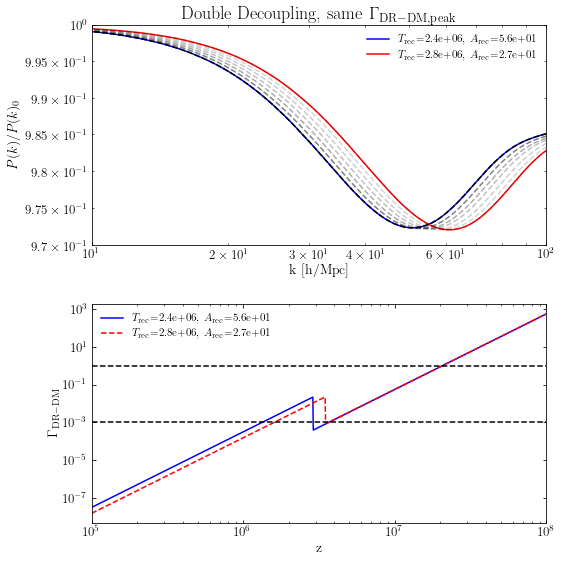

In [31]:
fig = plt.figure(1, figsize=(8,8))
plt.subplot(211)
plt.plot(kk, pk_dd_interp((T_rec_arr[idx], A_rec_arr[idx], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'b', label='$T_\mathrm{rec}$=%.1e, $A_\mathrm{rec}$=%.1e'%(T_rec_arr[idx], A_rec_arr[idx]))
plt.plot(kk, pk_dd_interp((T_rec_arr[idx_add], A_rec_arr[idx_sub], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'r', label='$T_\mathrm{rec}$=%.1e, $A_\mathrm{rec}$=%.1e'%(T_rec_arr[idx_add], A_rec_arr[idx_sub]))
for num_interp in range(num_interps):
    plt.plot(kk, pk_dd_interp((T_interps[num_interp], A_interps[num_interp], kk))/pk_dd_interp((T_rec_arr[0],A_rec_arr[0],kk)),'--k', alpha=1/(num_interp+1))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e2)
plt.ylim(0.97,1)
plt.xlabel('k [h/Mpc]')
plt.ylabel('$P(k)/P(k)_0$')
plt.legend()
plt.title('Double Decoupling, same $\Gamma_{\mathrm{DR-DM, peak}}$')
plt.subplot(212)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel(r'$\Gamma_{\mathrm{DR-DM}}$')
plt.plot(zs, dmus1, 'b', label='$T_\mathrm{rec}$=%.1e, $A_\mathrm{rec}$=%.1e'%(T_rec_arr[idx], A_rec_arr[idx]))
plt.plot(zs, dmus2, 'r--', label='$T_\mathrm{rec}$=%.1e, $A_\mathrm{rec}$=%.1e'%(T_rec_arr[idx_add], A_rec_arr[idx_sub]))
plt.plot(np.logspace(5,8,100),1e-3*np.ones(100), '--k')
plt.plot(np.logspace(5,8,100),np.ones(100), '--k')
plt.legend()
fig.tight_layout(h_pad=2)

plt.xlim(zs[0], zs[-1])

# plt.savefig('Figures/vary_A_rec_T_rec_same_peak.png')
plt.show()

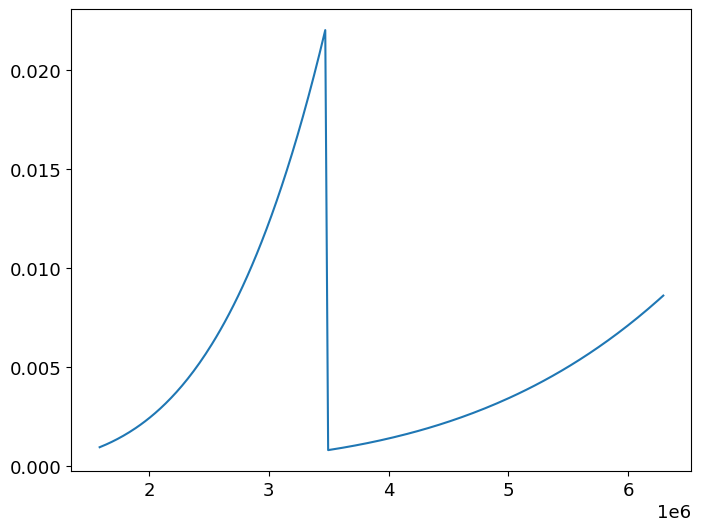

In [524]:
plt.plot(zs[400:600], dmus2[400:600], label='A_rec=%.2e, T_rec=%.2e'%(A_rec_arr[idx], T_rec_arr[idx]))
plt.show()

In [386]:
max(dmus1[400:600])

0.021522599977192622

In [385]:
max(dmus2[400:600])

0.021995705767113138